In [59]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [60]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [61]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [62]:
lfw.data.shape

(1140, 1850)

In [63]:
lfw.images.shape

(1140, 50, 37)

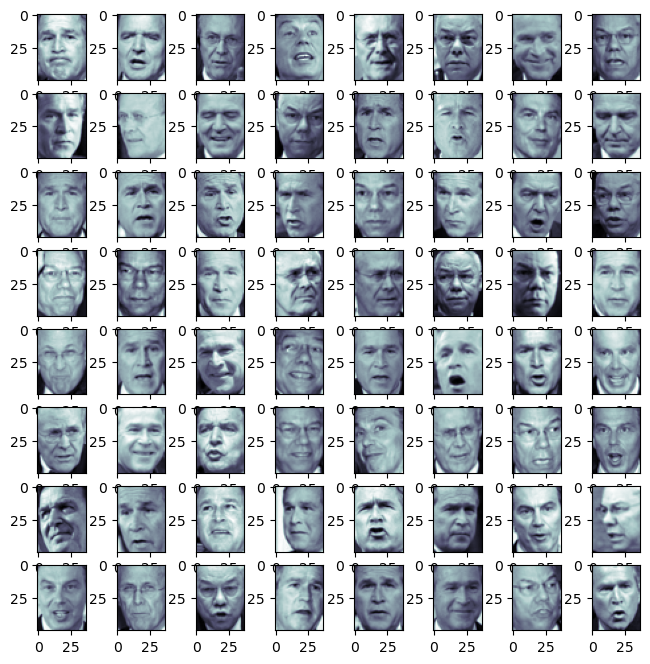

In [64]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()    

In [65]:
x=lfw.data
y=lfw.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [66]:
pca=PCA()
pca.fit(x_train)

PCA()

In [67]:
total=sum(pca.explained_variance_)
k=0
cSum=0
while(cSum/total<0.99):
    cSum+=pca.explained_variance_[k]
    k=k+1
k    

357

In [68]:
pca_1=PCA(n_components=k,whiten=True)
transformed_data=pca_1.fit_transform(x_train)
transformed_data.shape

(855, 357)

In [69]:
x_t=pca_1.inverse_transform(transformed_data)
x_t.shape

(855, 1850)

In [70]:
x_approx_images=x_t.reshape((855,50,37))

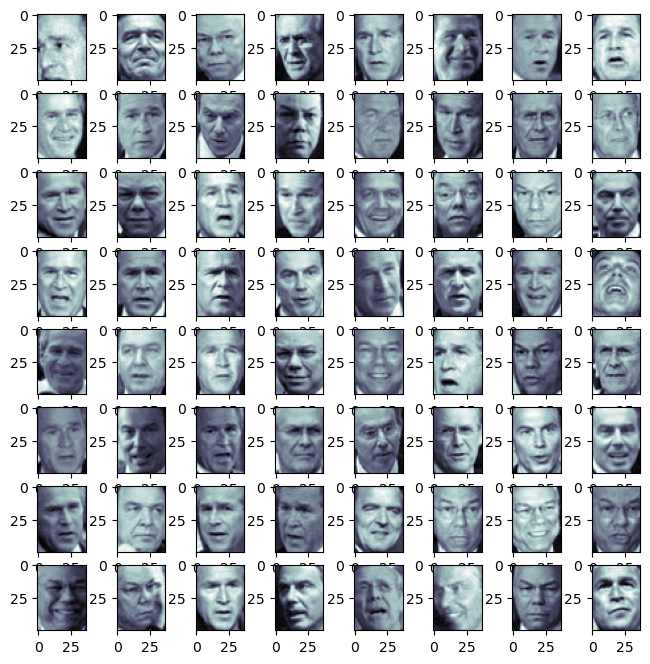

In [71]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()    

In [72]:
x_train_pca=transformed_data
x_test_pca=pca_1.transform(x_test)
# x_test_pca.shape,y_test.shape
x_train_pca.shape,y_train.shape

((855, 357), (855,))

In [73]:
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

3.1903913021087646
              precision    recall  f1-score   support

           0       0.86      0.69      0.76        61
           1       0.88      0.19      0.32        36
           2       0.58      0.99      0.73       122
           3       1.00      0.13      0.23        31
           4       0.79      0.31      0.45        35

    accuracy                           0.65       285
   macro avg       0.82      0.46      0.50       285
weighted avg       0.75      0.65      0.60       285

[[ 42   0  19   0   0]
 [  4   7  24   0   1]
 [  1   0 121   0   0]
 [  0   1  24   4   2]
 [  2   0  22   0  11]]


In [74]:
rf_1=ensemble.RandomForestClassifier()
start=time.time()
rf_1.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred_1=rf_1.predict(x_test_pca)
print(classification_report(y_test,y_pred_1))
print(confusion_matrix(y_test,y_pred_1))

1.9300997257232666
              precision    recall  f1-score   support

           0       0.75      0.25      0.37        61
           1       0.00      0.00      0.00        36
           2       0.46      0.99      0.63       122
           3       0.00      0.00      0.00        31
           4       1.00      0.03      0.06        35

    accuracy                           0.48       285
   macro avg       0.44      0.25      0.21       285
weighted avg       0.48      0.48      0.35       285

[[ 15   0  46   0   0]
 [  2   0  34   0   0]
 [  1   0 121   0   0]
 [  0   0  31   0   0]
 [  2   0  32   0   1]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
